In [1]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import string
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.figure_factory as ff
from scipy.cluster import hierarchy
import seaborn as sns

#stopwords = stopwords.words('english')

In [22]:
with open('./data/linux/linux_data.txt', "r") as read_file:
    linux_data = json.load(read_file)


In [3]:
def create_pairwise_similarity(data):   
    corpus, columns = [], [] 
    for d in range(len(data['commands'])):
        corpus.append(data['commands'][d]['description'])
    vect = TfidfVectorizer(min_df=1, stop_words="english" ) #, stop_words="english"                                                                                                                                                                                                  
    tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
    pairwise_similarity = tfidf * tfidf.T 
    pair_sim = pairwise_similarity.toarray()
    for d in range(len(data['commands'])):
        columns.append(data['commands'][d]['commands'])
    sim_df = pd.DataFrame(pair_sim, columns=columns, index=columns)
    return sim_df

In [ ]:
sim_df = create_pairwise_similarity(linux_data)

In [ ]:
sim_df.to_csv('./data/linux/linux_desc_sim_df.csv')

In [2]:
sim_df = pd.read_csv('./data/linux/linux_desc_sim_df.csv', index_col=0)

In [3]:
sim_df

,ac,addftinfo,addr2line,afmtodit,apropos,ar,arch,aria_chk,aria_dump_log,aria_pack,...,yum-copr,yum-cron,yum-plugin-copr,yum-shell,yum-updatesd,yum,yumdb,zdump,zic,zramctl
ac,1.000000,0.018699,0.032881,0.026264,0.000000,0.037880,0.022472,0.011509,0.000000,0.011861,...,0.000000,0.025928,0.025928,0.014638,0.007177,0.014671,0.009842,0.028204,0.033487,0.013239
addftinfo,0.018699,1.000000,0.029475,0.392554,0.017229,0.016401,0.000000,0.004522,0.000000,0.009021,...,0.000000,0.032133,0.032133,0.009180,0.005458,0.009201,0.001853,0.000000,0.031094,0.003069
addr2line,0.032881,0.029475,1.000000,0.067780,0.011760,0.055419,0.028032,0.052596,0.000000,0.029097,...,0.000000,0.069852,0.069852,0.015906,0.008953,0.015942,0.018371,0.039898,0.127370,0.038153
afmtodit,0.026264,0.392554,0.067780,1.000000,0.029406,0.026358,0.000000,0.006157,0.000000,0.026749,...,0.003072,0.056501,0.056501,0.009940,0.014893,0.009963,0.005060,0.004939,0.025390,0.012481
apropos,0.000000,0.017229,0.011760,0.029406,1.000000,0.019895,0.000000,0.014724,0.043485,0.029725,...,0.009176,0.078230,0.078230,0.014744,0.006862,0.012106,0.016022,0.006021,0.012658,0.004719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yum,0.014671,0.009201,0.015942,0.009963,0.012106,0.018869,0.000000,0.042584,0.000000,0.011016,...,0.101795,0.138488,0.138488,0.999243,0.090326,1.000000,0.064261,0.010909,0.019191,0.007200
yumdb,0.009842,0.001853,0.018371,0.005060,0.016022,0.007889,0.011028,0.010110,0.000000,0.001575,...,0.026873,0.029131,0.029131,0.064115,0.013550,0.064261,1.000000,0.009048,0.019707,0.029717
zdump,0.028204,0.000000,0.039898,0.004939,0.006021,0.015350,0.000000,0.008395,0.000000,0.000000,...,0.006577,0.011551,0.011551,0.010884,0.000000,0.010909,0.009048,1.000000,0.200768,0.008785
zic,0.033487,0.031094,0.127370,0.025390,0.012658,0.039350,0.000000,0.048958,0.000000,0.033617,...,0.011634,0.037332,0.037332,0.019148,0.005686,0.019191,0.019707,0.200768,1.000000,0.025193


In [4]:
sim_df['AS']['as']

1.0

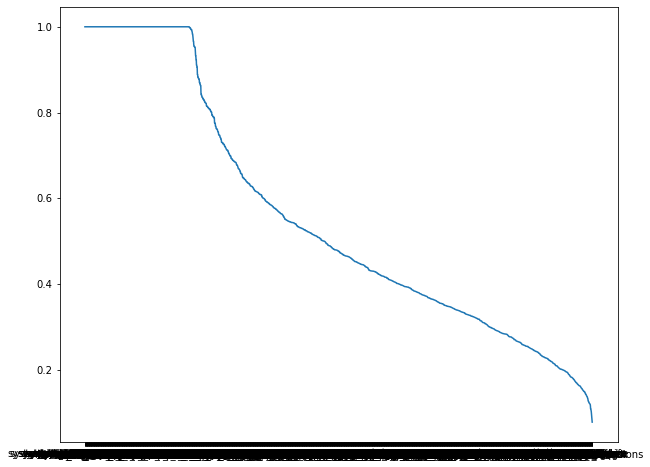

In [5]:
id_ar = np.identity((len(sim_df.columns)))
sim_df[sim_df == -0]= 0
temp = sim_df - id_ar
temp[temp < 0] = 0
temp2 = temp[temp.idxmax()]
a = temp.max()
b = temp.idxmax()
c = dict(a)
d = dict(b)
sim_sc = []
for k, v in c.items():
    sim_sc.append([k, d[k], c[k]] )
sim_sc_pd = pd.DataFrame(sim_sc, columns=['first', 'second', 'score'])
asc = sim_sc_pd.sort_values('score', ascending=False)
figure = plt.figure(figsize=(10, 8))
plt.plot(asc['first'], asc['score']);
plt.savefig('./results/linux/linux_desc_max_sim_per_command.png');

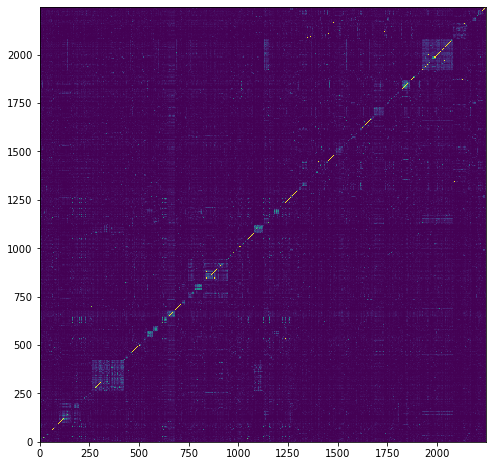

In [8]:
figure = plt.figure(figsize=(8,8))
plt.pcolor(sim_df)
#plt.savefig('./results/linux/linux_desc_overall.png');

In [6]:
def find_cmds_with_high_sim(sim_df, lower_threshold, upper_threshold):
    cols = list(sim_df.columns)
    simi = dict()
    for c in cols:
        vv = sim_df[(sim_df[c]>=lower_threshold)  & (sim_df[c]<upper_threshold)][[c]].index.values
        simi[c] = []
        for v in vv:  
            if v!=c and v not in simi.keys():  
                simi[c].append(v)
    return simi

In [7]:
def create_high_sim_cmds_df(sim_df, new_sim):
    data_items = new_sim.items()
    data_list = list(data_items)
    df = pd.DataFrame(data_list, columns=['comm1', 'comm2'])
    lst_col = 'comm2'
    r = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
     ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]
    r['sim_score'] = ''
    for i in range(len(r['comm1'])):
        first_comm = r.loc[i][0]
        second_comm = r.loc[i][1]
        sim_val = sim_df.loc[[first_comm]][second_comm][0]
        r.loc[i][2] =  round(sim_val,5)
    cols = np.unique(r['comm1'].values)
    indx = np.unique(r['comm2'].values)
    new_df = pd.DataFrame(columns=cols, index=indx)
    new_df = new_df.loc[:,~new_df.columns.duplicated()]
    new_df = new_df.loc[~new_df.index.duplicated(keep='first')]
    new_cols = new_df.columns
    new_indx = new_df.index
    for col in new_cols:
        for indx in new_indx:
            val = round(sim_df.loc[[col]][indx][0],5)
            new_df.loc[indx, col] = val
    return new_df , r

In [8]:
def plot_high_sim_cmds(new_df, limit):
    list_val = new_df.to_numpy('float').tolist()
    fig, ax = plt.subplots(1,1)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    im = ax.imshow(list_val)
    x_axis_val = list(new_df.columns.values)
    y_axis_val = list(new_df.index.values)
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_axis_val)))
    ax.set_yticks(np.arange(len(y_axis_val)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_axis_val)
    ax.set_yticklabels(y_axis_val)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(),rotation=0, ha="right",
         rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    ax.set_title("")
    if limit==0.99:
        plt.savefig('./results/linux/linux_desc_less_than_1.png')
    elif limit==1.0:
        plt.savefig('./results/linux/linux_desc_equal_1.png')
        
    plt.show()

In [9]:
simi_less_than_1 = find_cmds_with_high_sim(sim_df, 0.75, 0.99)
new_sim_less_than_1 = {k: v for k, v in simi_less_than_1.items() if len(simi_less_than_1[k])>0}
len(new_sim_less_than_1)

80

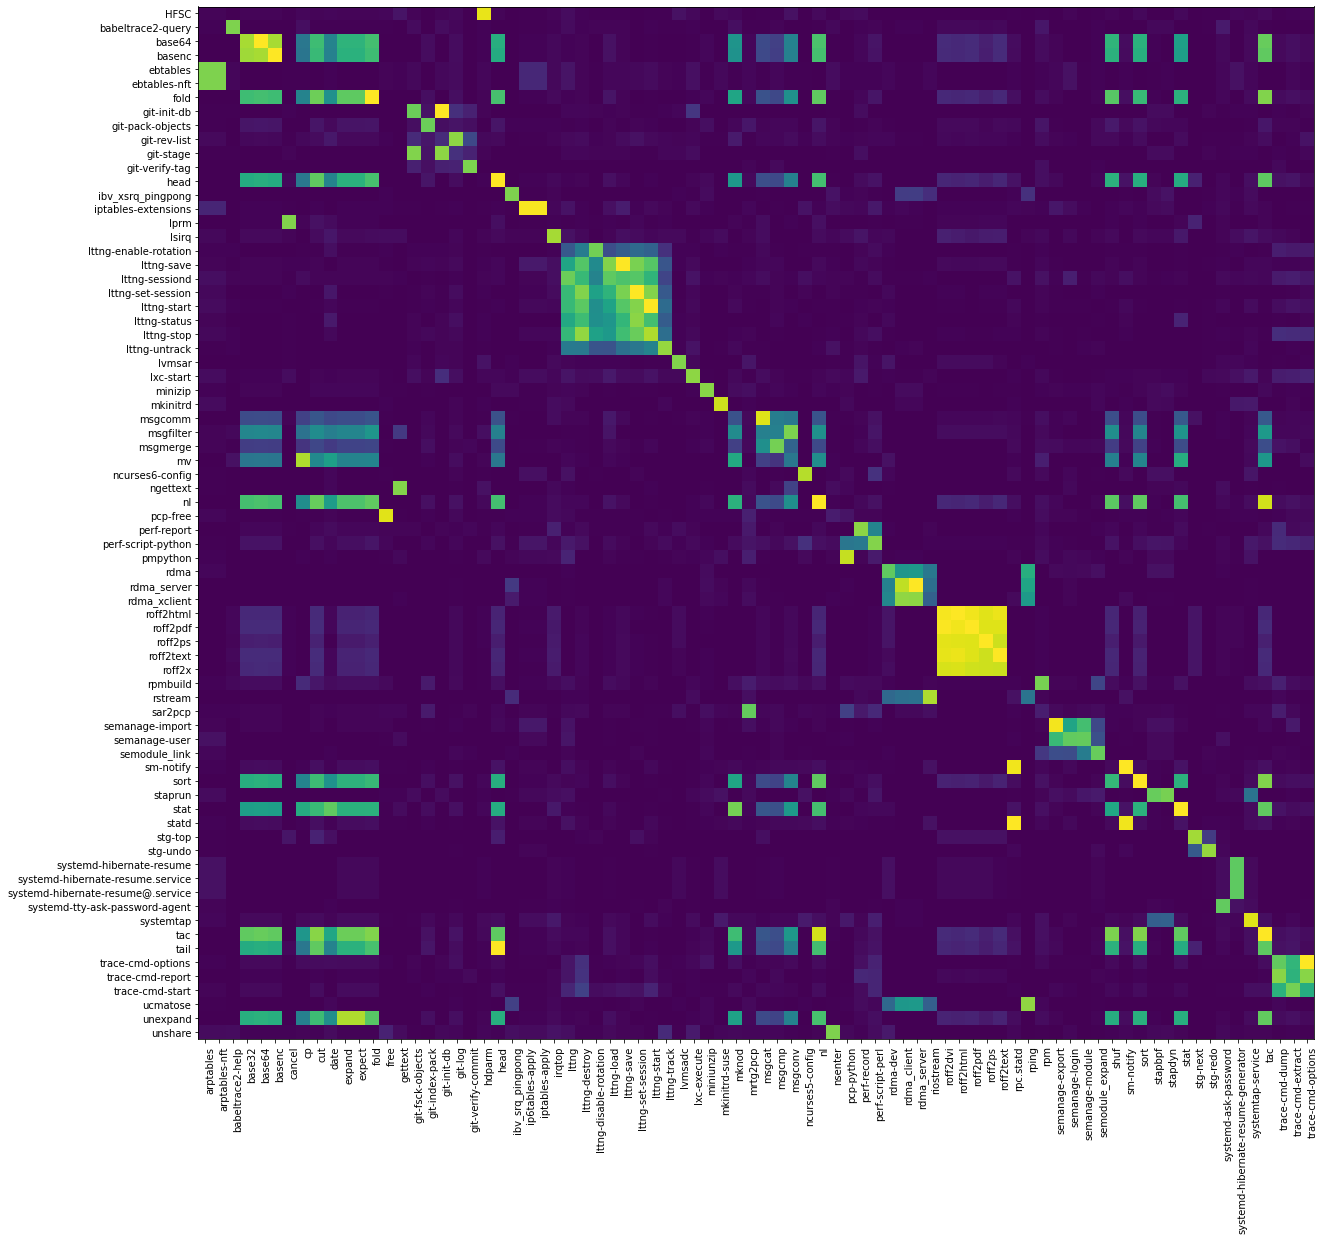

In [10]:
new_df_less_than_1, df_less_than_1_comd1_comd2 = create_high_sim_cmds_df(sim_df, new_sim_less_than_1)
plot_high_sim_cmds(new_df_less_than_1, 0.99)

In [11]:
df_less_than_1_comd1_comd2

,comm1,comm2,sim_score
0,babeltrace2-help,babeltrace2-query,
1,base32,base64,
2,base32,basenc,
3,base32,tac,
4,base64,basenc,
...,...,...,...
109,stapdyn,staprun,
110,systemd-hibernate-resume-generator,systemd-hibernate-resume,
111,systemd-hibernate-resume-generator,systemd-hibernate-resume.service,
112,systemd-hibernate-resume-generator,systemd-hibernate-resume@.service,


In [12]:
simi_equal_1 = find_cmds_with_high_sim(sim_df, 0.99, 1.09)
new_sim_equal_1 = {k: v for k, v in simi_equal_1.items() if len(simi_equal_1[k])>0}
len(new_sim_equal_1)

274

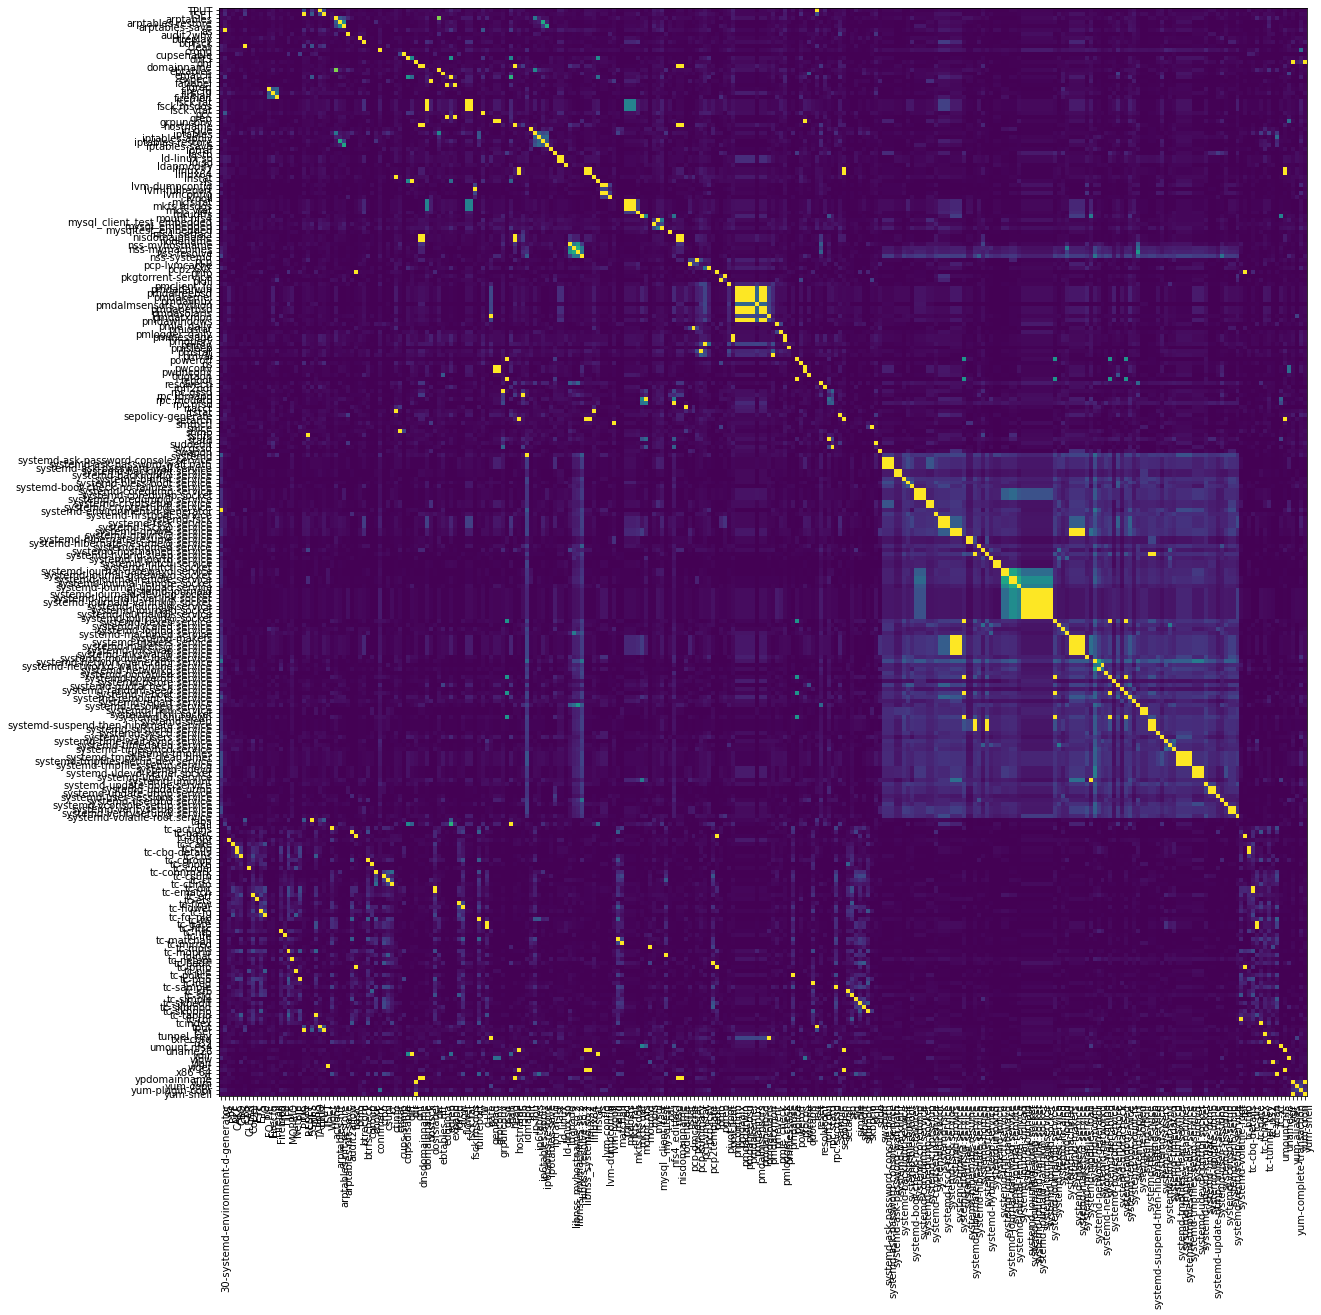

In [13]:
new_df_equal_1, df_equal_1_comd1_comd2 = create_high_sim_cmds_df(sim_df, new_sim_equal_1)
plot_high_sim_cmds(new_df_equal_1, 1.0)

In [14]:
comm1_unique = list((df_less_than_1_comd1_comd2['comm1'].unique()))
comm2_unique = list((df_less_than_1_comd1_comd2['comm2'].unique()))
for cmd in comm2_unique:
    if cmd not in comm1_unique:
        comm1_unique.append(cmd)
new = sim_df.loc[comm1_unique]

In [ ]:
fig = ff.create_dendrogram(new,  labels=new.index)
fig.update_layout(width=1600, height=800)
fig.write_image('./results/linux/linux_desc_dendo_sim_less_than_1.png')
fig.show()

In [15]:
comm1_unique = list((df_equal_1_comd1_comd2['comm1'].unique()))
comm2_unique = list((df_equal_1_comd1_comd2['comm2'].unique()))
for cmd in comm2_unique:
    if cmd not in comm1_unique:
        comm1_unique.append(cmd)
new = sim_df.loc[comm1_unique]

In [ ]:
fig = ff.create_dendrogram(new,  labels=new.index)
fig.update_layout(width=1600, height=800)
fig.write_image('./results/linux/linux_desc_dendo_sim_equal_1.png')
fig.show()

In [16]:
def cal_histo(new_sim):
    G = nx.Graph()
    for key, value in new_sim.items():
        for v in value:
            G.add_edge(key,v)
    subgraphs =  list(nx.connected_components(G))
    new = dict()
    for i in range(len(subgraphs)):
        new[next(iter(subgraphs[i]))] = len(subgraphs[i])
    new = {k: v for k, v in sorted(new.items(), key=lambda item: item[1],reverse=True)} 
    return subgraphs, new
           

In [17]:
simi_overall = find_cmds_with_high_sim(sim_df, 0.75, 1.09)
new_sim = {k: v for k, v in simi_overall.items() if len(simi_overall[k])>0}
len(new_sim)

348

In [19]:
subgraphs, new = cal_histo(new_sim)

In [ ]:
new['base*, sort, head, tac'] = new.pop('unexpand')
new['lttng-*'] = new.pop('lttng-save')
new['systemd-journald*'] = new.pop('systemd-journald.service')
new['pmda*'] = new.pop('pmdanetbsd')
new['systemd-growfs/makefs'] = new.pop('systemd-mkswap@.service')
new['nodename, hostname'] = new.pop('hostname')
new['roff2*'] = new.pop('roff2pdf')
new['systemd-tmpfiles*'] = new.pop('systemd-tmpfiles-clean.service')
new['systemd-ask*'] = new.pop('systemd-ask-password-console.path')
new['systemd-coredump*'] = new.pop('systemd-coredump.socket')
new['systemd-hibernate*'] = new.pop('systemd-hibernate-resume-generator')
new['systemd-cryptsetup*'] = new.pop('systemd-cryptsetup@.service')
new['systemd-journal-gatewayd*'] = new.pop('systemd-journal-gatewayd.socket')
new['systemd-journal-remote*'] = new.pop('systemd-journal-remote.service')
new['arptables, ebtables'] = new.pop('ebtables-nft')

new

In [ ]:
new = {k: v for k, v in sorted(new.items(), key=lambda item: item[1],reverse=True)} 
new = {key:val for key, val in new.items() if val >3}
new

In [ ]:
import seaborn as sns
sns.set()
fig= plt.figure(figsize=(12,6))
x = list(new.keys())
y = list(new.values())
plt.bar(x, y,  color='lightgreen')
plt.xticks()
labels = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
plt.yticks(labels, rotation='horizontal')
plt.title('Clusters and their sizes')
for i in range(len(x)):
    if i==0:
         plt.annotate(str(x[i]), xy=(x[i],y[i]), ha='center', va='top', rotation=90, fontsize=23)
    elif i==4:
        plt.annotate(str(x[i]), xy=(x[i],y[i]), ha='center', va='center', rotation=90, fontsize=23)
    else:
        plt.annotate(str(x[i]), xy=(x[i],y[i]), ha='center', va='bottom', rotation=90, fontsize=23)

plt.xticks([])
plt.tight_layout()
plt.savefig('./results/linux/linux_desc_histo.png')
plt.show()


In [15]:
def get_max_sim_comds(sim_df, threshold):
    cols = list(sim_df.columns)
    simi = dict()
    for c in cols:
        vv = sim_df.loc[sim_df[c]>threshold][[c]].index.values
        simi[c] = []
        for v in vv:  
            if v!=c and v not in simi.keys():  
                simi[c].append(v)
    new_sim = {k: v for k, v in simi.items() if len(simi[k])>0}
    data_items = new_sim.items()
    data_list = list(data_items)
    
    df = pd.DataFrame(data_list, columns=['comm1', 'comm2'])
    lst_col = 'comm2'
    
    r = pd.DataFrame({col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]

    r['sim_score'] = ''
    
    for i in range(len(r['comm1'])):
        first_comm = r.loc[i][0]
        second_comm = r.loc[i][1]
        sim_val = sim_df.loc[[first_comm]][second_comm][0]
        r.loc[i, 'sim_score'] =  round(sim_val,3)
    return r, new_sim


In [16]:
df_high_sim, new_sim = get_max_sim_comds(sim_df, 0.75)



In [19]:
df_high_sim.to_csv('./data/linux/linux_high_sim_description_75.csv', index=False)